In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
spark

In [3]:
from pyspark.sql.functions import *

In [4]:
# load user data
user_data = spark.read.csv('file:///home/hadoop/Downloads/users.txt', inferSchema=True, header=True)
user_data.show()

+-------+------------+------------+
|user_id|   user_name|   full_name|
+-------+------------+------------+
|      1|amitmishra08| amit mishra|
|      2|    sharon_1|sharon dcruz|
|      3|   naveen007|naveen rajan|
|      4|   allen_456|  allen bose|
|      5|    siva2109|    siva rao|
|      6| bhagya10200|      bhagya|
|      7|  devika9091|   devika T.|
|      8|   anonymous|          NA|
+-------+------------+------------+



In [5]:
# load followers data
follower_data = spark.read.csv('file:///home/hadoop/Downloads/followers.txt',
                               inferSchema=True,
                                header=True)
follower_data.show()

+-----------+-----------+
|follower_id|followee_id|
+-----------+-----------+
|          1|          2|
|          2|          3|
|          2|          4|
|          4|          2|
|          3|          1|
|          1|          4|
|          4|          7|
|          7|          8|
|          1|          6|
|          5|          6|
|          6|          5|
+-----------+-----------+



#### Set up spark for graph frames 

In [6]:
!pip install graphframes

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from graphframes import GraphFrame

In [8]:
vertices = user_data.withColumnRenamed('user_id', 'id').select('id', 'user_name')
vertices.show()

+---+------------+
| id|   user_name|
+---+------------+
|  1|amitmishra08|
|  2|    sharon_1|
|  3|   naveen007|
|  4|   allen_456|
|  5|    siva2109|
|  6| bhagya10200|
|  7|  devika9091|
|  8|   anonymous|
+---+------------+



In [9]:
edges = follower_data.withColumnRenamed('follower_id', 'src')\
.withColumnRenamed('followee_id', 'dst')

edges.show()

+---+---+
|src|dst|
+---+---+
|  1|  2|
|  2|  3|
|  2|  4|
|  4|  2|
|  3|  1|
|  1|  4|
|  4|  7|
|  7|  8|
|  1|  6|
|  5|  6|
|  6|  5|
+---+---+



In [11]:
# create a graphframe with vertices and edges
graph = GraphFrame(vertices, edges)

In [20]:
graph.edges.show()

+---+---+
|src|dst|
+---+---+
|  1|  2|
|  2|  3|
|  2|  4|
|  4|  2|
|  3|  1|
|  1|  4|
|  4|  7|
|  7|  8|
|  1|  6|
|  5|  6|
|  6|  5|
+---+---+



In [21]:
graph.vertices.show()

+---+------------+
| id|   user_name|
+---+------------+
|  1|amitmishra08|
|  2|    sharon_1|
|  3|   naveen007|
|  4|   allen_456|
|  5|    siva2109|
|  6| bhagya10200|
|  7|  devika9091|
|  8|   anonymous|
+---+------------+



In [15]:
# run pageRank algorithm from GraphX
ranks = graph.pageRank(resetProbability=0.25, maxIter=20)

In [16]:
ranks

GraphFrame(v:[id: int, user_name: string ... 1 more field], e:[src: int, dst: int ... 1 more field])

In [18]:
ranks.vertices.orderBy(ranks.vertices.pagerank.desc()).show()

+---+------------+------------------+
| id|   user_name|          pagerank|
+---+------------+------------------+
|  6| bhagya10200| 1.763895520679174|
|  5|    siva2109|1.6489141795499844|
|  4|   allen_456|0.8440441090101278|
|  2|    sharon_1|0.8440441090101278|
|  1|amitmishra08|0.8073449902828328|
|  8|   anonymous|0.8073449902828328|
|  3|   naveen007|  0.64220605059246|
|  7|  devika9091|  0.64220605059246|
+---+------------+------------------+



#### create a network graph

In [31]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 2.6 MB/s            
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [33]:
import networkx as nx

In [43]:
nx_graph = nx.DiGraph()
edges_df = edges.toPandas()
for _, row in edges_df.iterrows():
    nx_graph.add_edge(row['src'], row['dst'])

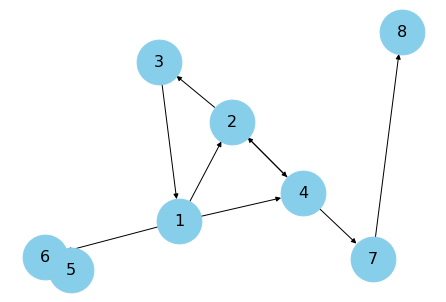

In [44]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(nx_graph)

nx.draw(nx_graph, 
        pos, 
        with_labels = True, 
        node_size = 2000, 
        node_color = 'skyblue', 
        font_size=16, 
        arrows=True)

plt.show()